In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.8 MB/s eta 0:00:00


# clening done  Using RF vs xgboost vs CatBoost  for Regression ✔:\::::
Exploring Data Tables 'sensors_data1

In [ ]:
#Importing Libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_file.xlsx' with the path to your Excel file
# Load your dataset
# Replace 'your_data.csv' with the path to your dataset file
df1 = pd.read_csv('sensors_data1.csv', sep=';')
# Now you can work with the data in the DataFrame 'df'
print(df1.head())

   id     nodeid   timestamp  battery  frequency data_rate coding_rate  \
0   1  tinovi-06  1605522681       96      868.1  SF7BW125         4/5   
1   2  tinovi-03  1605522697       99      868.1  SF7BW125         4/5   
2   3  tinovi-05  1605522723      107      868.1  SF7BW125         4/5   
3   4  tinovi-02  1605522759      109      868.3  SF7BW125         4/5   
4   5  tinovi-07  1605522764      100      868.1  SF7BW125         4/5   

                 gtw_id  gtw_channel  gtw_rssi  gtw_snr  soil_temp  soil_hum  
0  eui-3133303739005600            0       -64     9.50      12.09     17.66  
1  eui-3133303739005600            0       -71     8.75      12.11     28.62  
2  eui-3133303739005600            0       -73     8.75      12.58     22.24  
3  eui-3133303739005600            1       -74     9.25      11.81     61.62  
4  eui-3133303739005600            0       -65     8.75      12.14     45.75  


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190503 entries, 0 to 190502
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           190503 non-null  int64  
 1   nodeid       190503 non-null  object 
 2   timestamp    190503 non-null  int64  
 3   battery      190503 non-null  int64  
 4   frequency    190503 non-null  float64
 5   data_rate    190503 non-null  object 
 6   coding_rate  190503 non-null  object 
 7   gtw_id       190503 non-null  object 
 8   gtw_channel  190503 non-null  int64  
 9   gtw_rssi     190503 non-null  int64  
 10  gtw_snr      190503 non-null  float64
 11  soil_temp    190502 non-null  float64
 12  soil_hum     190502 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 18.9+ MB


In [ ]:
# ลบคอลัมน์ที่ไม่ได้ใช้
df_new = df1.drop(['nodeid', 'timestamp', 'data_rate', 'gtw_id' ,'coding_rate', 'gtw_channel','id'], axis=1)

# บันทึกเป็นไฟล์ CSV ใหม่
df_new.to_csv('new_data.csv', index=False)

df_new.describe().T

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Load dataset
df_new = pd.read_csv('new_data.csv')
# Remove leading and trailing spaces from column names
df_new.columns = df_new.columns.str.strip()
# Drop rows with NaN values
# ลบคอลัมน์ที่ไม่ได้ใช้
#df_new = df_new.drop([ 'id'], axis=1)
#df_clean = df_new.dropna(axis=0)
# ตรวจสอบข้อมูลที่หายไปหรือมีค่าที่ไม่เหมาะสม
missing_data = df_new.isnull().sum()
print("Missing data:")
print(missing_data)

# ลบแถวที่มีข้อมูลที่หายไป
data_cleaned = df_new.dropna()

# ลบข้อมูลที่ซ้ำกัน
data_cleaned = data_cleaned.drop_duplicates()



Missing data:
battery      0
frequency    0
gtw_rssi     0
gtw_snr      0
soil_temp    1
soil_hum     1
dtype: int64


In [ ]:
# บันทึกข้อมูลที่ถูกทำความสะอาดแล้ว
data_cleaned.to_csv('cleaned_data.csv', index=False)


In [ ]:

data_cleaned.describe().T



,count,mean,std,min,25%,50%,75%,max
battery,190455.0,95.060749,5.592860,82.00,91.00,95.00,99.00,144.00
frequency,190455.0,867.800122,0.458333,867.10,867.50,867.90,868.30,868.50
gtw_rssi,190455.0,-69.988527,9.804404,-108.00,-78.00,-69.00,-62.00,-45.00
gtw_snr,190455.0,8.651296,1.101987,-9.00,7.75,9.00,9.50,11.75
soil_temp,190455.0,5.184605,2.428072,0.46,3.31,5.13,6.74,22.65
soil_hum,190455.0,76.192796,17.401448,1.11,68.42,77.03,90.64,97.18


## **Visualizing the Data**

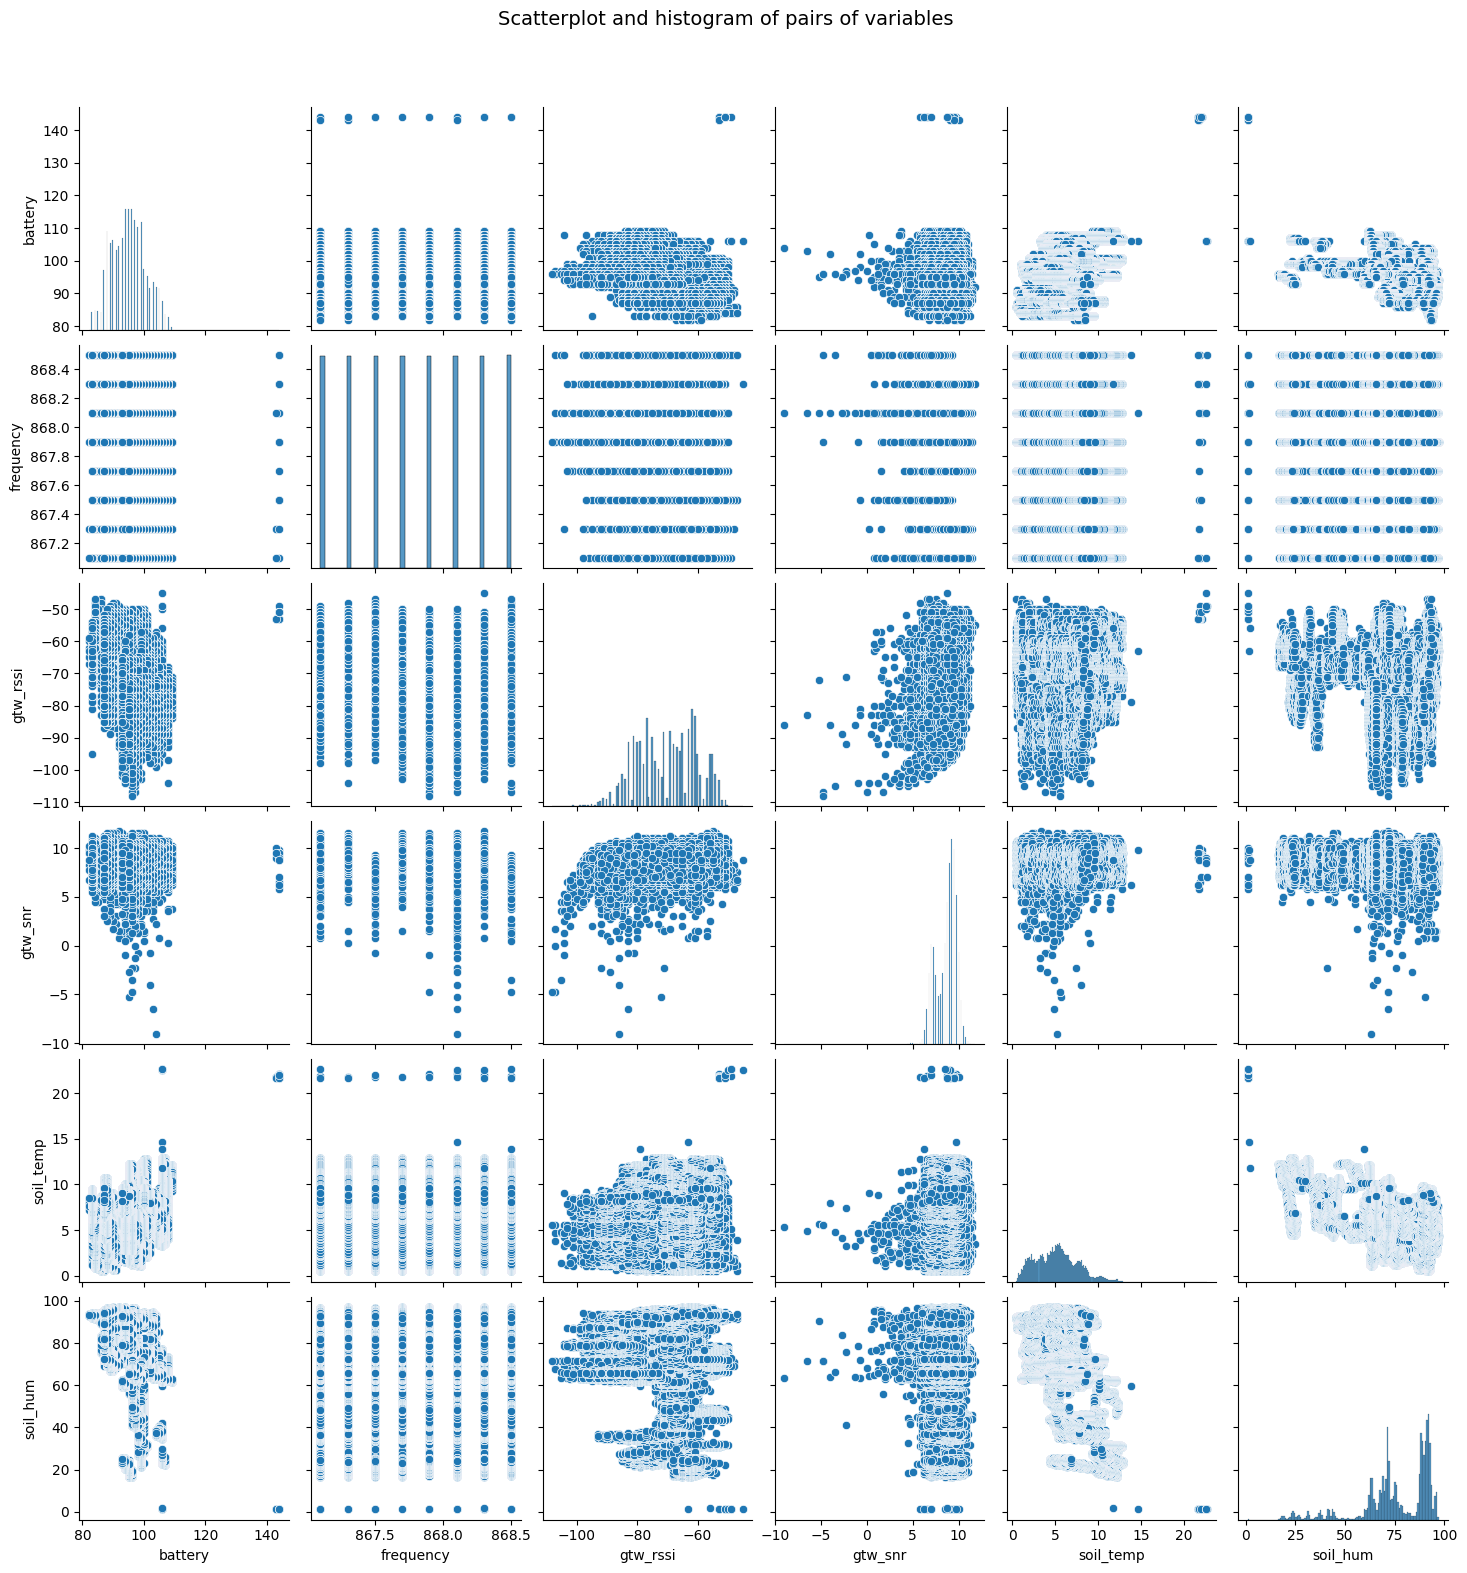

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# Load dataset
data_cleaned.describe().T
g = sns.pairplot(df_clean)
g.fig.suptitle("Scatterplot and histogram of pairs of variables ",
               fontsize = 14, # defining the size of the title
               y=1.05); # y = defining title y position (height)

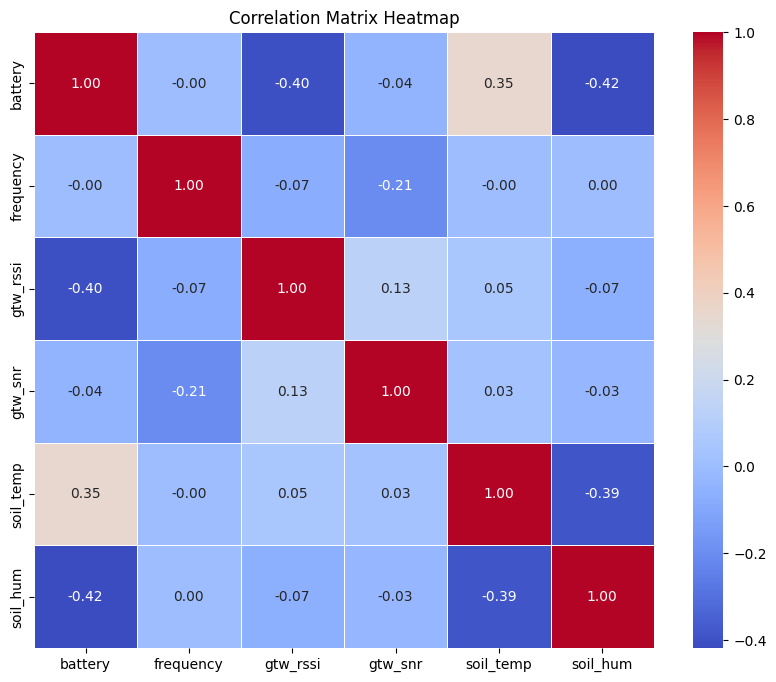

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.2 MB/s eta 0:00:00


**predict**

y = df_clean['battery']

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Load dataset
#df_new = pd.read_csv('new_data.csv')


# Now you can use df_clean for modeling

# Remove leading and trailing spaces from column names
data_cleaned.columns = data_cleaned.columns.str.strip()
# Drop rows with NaN values
# Print the column names to check the presence of 'wifi_tput' and other columns
print(data_cleaned.columns)

y = data_cleaned['battery']
X = data_cleaned.drop(['battery'], axis=1)  # You can either include or drop it here

# Define feature subsets
feature_subsets = [['gtw_rssi'], ['soil_temp'], ['soil_hum'], ['frequency'], ['gtw_snr'],
                   ['gtw_rssi', 'soil_temp'], ['gtw_rssi', 'gtw_snr'], ['gtw_rssi', 'soil_hum'],
                   ['gtw_rssi', 'soil_temp', 'soil_hum'], ['gtw_rssi', 'soil_hum', 'frequency'],
                   ['gtw_rssi', 'soil_temp', 'frequency'], ['gtw_rssi', 'soil_hum',  'gtw_snr'],
                   ['gtw_rssi', 'soil_hum', 'soil_temp',  'gtw_snr'], ['gtw_rssi', 'soil_hum', 'soil_temp',  'gtw_snr', 'frequency']]

# Define models
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through models and feature subsets
for model_name, model in models.items():
    print(f"Model: {model_name}")
    for subset in feature_subsets:
        start_time = time.time()

        # Train the model on the training data for the current feature subset
        model.fit(X_train[subset], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[subset])

        # Evaluate the model using Root Mean Squared Error (RMSE)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Calculate the percentage of variance explained
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        end_time = time.time()
        execution_time = end_time - start_time

        print(f"Features: {subset}, RMSE: {rmse}, Variance Explained: {var_explained:.2f}%, Time: {execution_time:.4f} seconds")
        print('-' * 40)


Index(['battery', 'frequency', 'gtw_rssi', 'gtw_snr', 'soil_temp', 'soil_hum'], dtype='object')
Model: RandomForest
Features: ['gtw_rssi'], RMSE: 4.961768650801484, Variance Explained: 21.56%, Time: 6.3132 seconds
----------------------------------------
Features: ['soil_temp'], RMSE: 5.001452129160781, Variance Explained: 20.30%, Time: 48.1436 seconds
----------------------------------------
Features: ['soil_hum'], RMSE: 4.420111812135031, Variance Explained: 37.75%, Time: 47.0748 seconds
----------------------------------------
Features: ['frequency'], RMSE: 5.602449717039857, Variance Explained: -0.00%, Time: 4.1364 seconds
----------------------------------------
Features: ['gtw_snr'], RMSE: 5.587790595866334, Variance Explained: 0.52%, Time: 6.0980 seconds
----------------------------------------
Features: ['gtw_rssi', 'soil_temp'], RMSE: 4.161370950155732, Variance Explained: 44.83%, Time: 43.4342 seconds
----------------------------------------
Features: ['gtw_rssi', 'gtw_snr'],

y = df_clean['gtw_snr']

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Load dataset
cleaned_data = pd.read_csv('cleaned_data (1).csv')

# Remove leading and trailing spaces from column names
cleaned_data.columns = cleaned_data.columns.str.strip()
# Drop rows with NaN values

# Print the column names to check the presence of 'wifi_tput' and other columns
print(cleaned_data.columns)

y = cleaned_data['gtw_snr']
X = cleaned_data.drop(['gtw_snr'], axis=1)  # You can either include or drop it here

# Define feature subsets
feature_subsets = [['battery'], ['soil_temp'], ['soil_hum'], ['frequency'], ['gtw_rssi'],
                   ['battery', 'soil_temp'], ['battery', 'gtw_rssi'], ['battery', 'soil_hum'],['battery', 'frequency'],
                   ['battery', 'soil_temp', 'soil_hum'], ['battery', 'soil_hum', 'frequency'],
                   ['battery', 'soil_temp', 'frequency'], ['soil_hum', 'soil_temp', 'gtw_rssi'],
                   ['soil_hum', 'soil_temp'], ['battery', 'soil_hum', 'frequency', 'gtw_rssi'], ['soil_temp', 'soil_hum', 'frequency', 'gtw_rssi']]
# Define models
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through models and feature subsets
for model_name, model in models.items():
    print(f"Model: {model_name}")
    for subset in feature_subsets:
        start_time = time.time()

        # Train the model on the training data for the current feature subset
        model.fit(X_train[subset], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[subset])

        # Evaluate the model using Root Mean Squared Error (RMSE)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Calculate the percentage of variance explained
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        end_time = time.time()
        execution_time = end_time - start_time

        print(f"Features: {subset}, RMSE: {rmse}, Variance Explained: {var_explained:.2f}%, Time: {execution_time:.4f} seconds")
        print('-' * 40)


Index(['battery', 'frequency', 'gtw_rssi', 'gtw_snr', 'soil_temp', 'soil_hum'], dtype='object')
Model: RandomForest
Features: ['battery'], RMSE: 1.097139563296493, Variance Explained: 0.42%, Time: 5.6504 seconds
----------------------------------------
Features: ['soil_temp'], RMSE: 1.1024864556816212, Variance Explained: -0.56%, Time: 33.7859 seconds
----------------------------------------
Features: ['soil_hum'], RMSE: 1.1000160894491637, Variance Explained: -0.11%, Time: 38.3872 seconds
----------------------------------------
Features: ['frequency'], RMSE: 0.6377944522511064, Variance Explained: 66.35%, Time: 4.4645 seconds
----------------------------------------
Features: ['gtw_rssi'], RMSE: 1.038388914450681, Variance Explained: 10.80%, Time: 8.1898 seconds
----------------------------------------
Features: ['battery', 'soil_temp'], RMSE: 1.1184067784270064, Variance Explained: -3.48%, Time: 36.1721 seconds
----------------------------------------
Features: ['battery', 'gtw_rssi

y = df_clean['gtw_rssi']

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Load dataset
cleaned_data = pd.read_csv('cleaned_data (1).csv')


# Now you can use df_clean for modeling

# Remove leading and trailing spaces from column names
cleaned_data.columns = cleaned_data.columns.str.strip()

# Print the column names to check the presence of 'wifi_tput' and other columns
print(cleaned_data.columns)

y = cleaned_data['gtw_rssi']
X = cleaned_data.drop(['gtw_rssi'], axis=1)  # You can either include or drop it here

# Define feature subsets
feature_subsets = [['battery'], ['soil_temp'], ['soil_hum'], ['frequency'], ['gtw_snr'],
                   ['battery', 'soil_temp'], ['battery', 'gtw_snr'], ['battery', 'soil_hum'],['battery', 'frequency'],
                   ['battery', 'soil_temp', 'soil_hum'], ['battery', 'soil_hum', 'frequency'],
                   ['soil_temp', 'soil_hum'], ['battery', 'soil_hum', 'frequency'],
                   ['battery', 'soil_temp', 'frequency'], ['battery', 'soil_hum', 'soil_temp', 'gtw_snr'],
                   ['battery', 'soil_hum', 'soil_temp', 'frequency', 'gtw_snr']]
# Define models
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through models and feature subsets
for model_name, model in models.items():
    print(f"Model: {model_name}")
    for subset in feature_subsets:
        start_time = time.time()

        # Train the model on the training data for the current feature subset
        model.fit(X_train[subset], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[subset])

        # Evaluate the model using Root Mean Squared Error (RMSE)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Calculate the percentage of variance explained
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        end_time = time.time()
        execution_time = end_time - start_time

        print(f"Features: {subset}, RMSE: {rmse}, Variance Explained: {var_explained:.2f}%, Time: {execution_time:.4f} seconds")
        print('-' * 40)


Index(['battery', 'frequency', 'gtw_rssi', 'gtw_snr', 'soil_temp', 'soil_hum'], dtype='object')
Model: RandomForest
Features: ['battery'], RMSE: 8.760813084815457, Variance Explained: 19.89%, Time: 6.2686 seconds
----------------------------------------
Features: ['soil_temp'], RMSE: 9.628901646734434, Variance Explained: 3.23%, Time: 32.8810 seconds
----------------------------------------
Features: ['soil_hum'], RMSE: 7.8984081551678935, Variance Explained: 34.88%, Time: 39.0149 seconds
----------------------------------------
Features: ['frequency'], RMSE: 9.73559046577604, Variance Explained: 1.07%, Time: 3.9717 seconds
----------------------------------------
Features: ['gtw_snr'], RMSE: 9.584758684440724, Variance Explained: 4.11%, Time: 5.5237 seconds
----------------------------------------
Features: ['battery', 'soil_temp'], RMSE: 7.032206602817028, Variance Explained: 48.38%, Time: 33.5553 seconds
----------------------------------------
Features: ['battery', 'gtw_snr'], RMSE

KeyboardInterrupt: 

Index(['battery', 'frequency', 'gtw_rssi', 'gtw_snr', 'soil_temp', 'soil_hum'], dtype='object')
Model: RandomForest
Train RMSE: 2.0572540324524637
Test RMSE: 2.9431344829500516
Pov: 90.95909081749261

Model: XGBoost
Train RMSE: 2.742023488300102
Test RMSE: 3.087620915032077
Pov: 90.04949445232413

Model: CatBoost
Train RMSE: 2.761482431546816
Test RMSE: 3.0175978647261115
Pov: 90.49535924942928



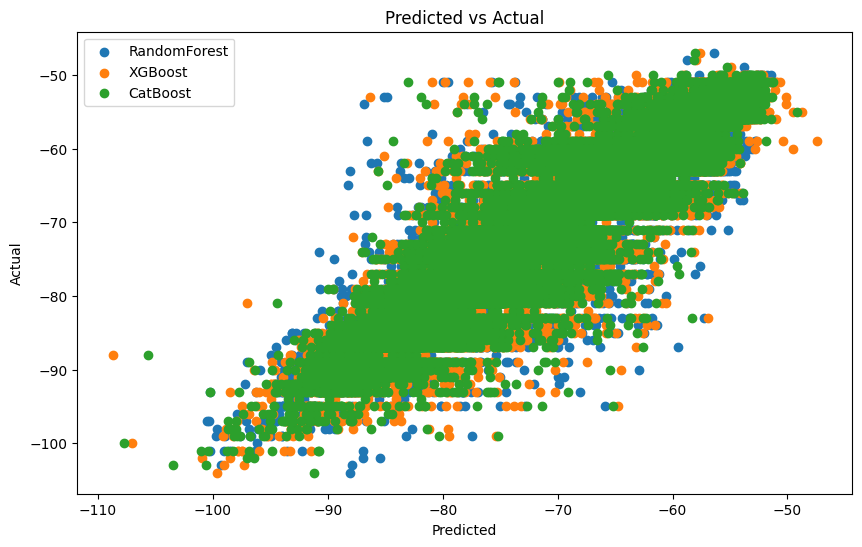

In [ ]:
#pca = PCA(n_components=4)
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data_cleaned = pd.read_csv('cleaned_data.csv')

# Now you can use df_clean for modeling

# Remove leading and trailing spaces from column names
data_cleaned.columns = data_cleaned.columns.str.strip()

# Print the column names to check the presence of 'wifi_tput' and other columns
print(data_cleaned.columns)

y = data_cleaned['gtw_rssi']
X = data_cleaned.drop(['gtw_rssi'], axis=1)  # You can either include or drop it here

# Define feature subsets
feature_subsets = [['battery'], ['soil_temp'], ['soil_hum'], ['frequency'], ['gtw_snr'],
                   ['battery', 'soil_temp'], ['battery', 'gtw_snr'], ['battery', 'soil_hum'],['battery', 'frequency'],
                   ['battery', 'soil_temp', 'soil_hum'], ['battery', 'soil_hum', 'frequency'],
                   ['battery', 'soil_temp', 'frequency'], ['battery', 'soil_hum', 'soil_temp', 'gtw_snr'],
                   ['battery', 'soil_hum', 'soil_temp', 'frequency', 'gtw_snr']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train models
random_state = 42
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

trained_models = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    trained_models[model_name] = model

# Predict using trained models
predictions = {}
for model_name, model in trained_models.items():
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)
    predictions[model_name] = {'Train': y_pred_train, 'Test': y_pred_test}

# Calculate RMSE and Pov
results = {}
for model_name, preds in predictions.items():
    train_rmse = np.sqrt(mean_squared_error(y_train, preds['Train']))
    test_rmse = np.sqrt(mean_squared_error(y_test, preds['Test']))
    total_variance = np.var(y_test)
    residual_variance = np.var(y_test - preds['Test'])
    var_explained = 100 * (1 - (residual_variance / total_variance))
    results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Pov': var_explained}

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
plt.figure(figsize=(10, 6))
for model_name, preds in predictions.items():
    plt.scatter(preds['Test'], y_test, label=model_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()


Index(['battery', 'frequency', 'gtw_rssi', 'gtw_snr', 'soil_temp', 'soil_hum'], dtype='object')
Model: RandomForest
Train RMSE: 0.42348702779491026
Test RMSE: 0.5439592924569727
Pov: 75.52218967572801

Model: XGBoost
Train RMSE: 0.49173449034352756
Test RMSE: 0.5475335316874411
Pov: 75.1989189264177

Model: CatBoost
Train RMSE: 0.4969847519556216
Test RMSE: 0.544310959945914
Pov: 75.4903307246867



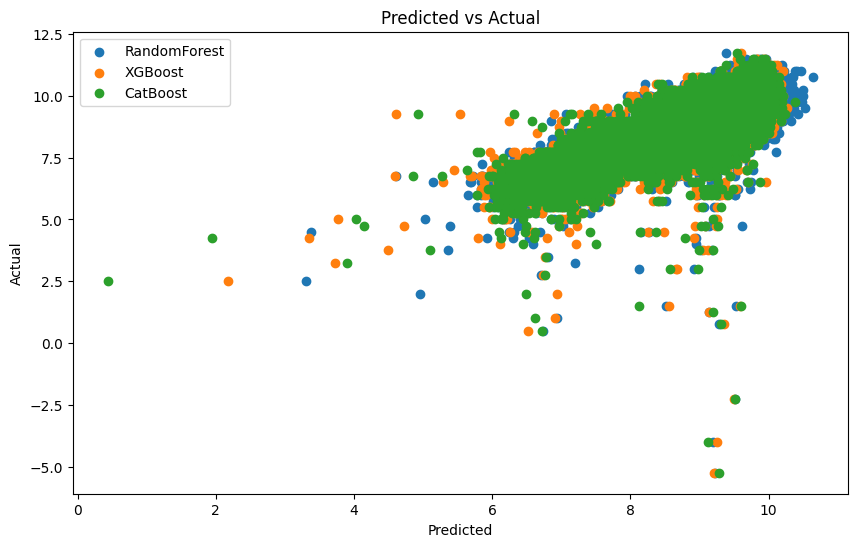

In [ ]:
#pca = PCA(n_components=4)
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data_cleaned = pd.read_csv('cleaned_data.csv')
# Remove leading and trailing spaces from column names
data_cleaned.columns = data_cleaned.columns.str.strip()

# Print the column names to check the presence of 'wifi_tput' and other columns
print(data_cleaned.columns)

y = data_cleaned['gtw_snr']
X = data_cleaned.drop(['gtw_snr'], axis=1)  # You can either include or drop it here

# Define feature subsets
feature_subsets = [['battery'], ['soil_temp'], ['soil_hum'], ['frequency'], ['gtw_rssi'],
                   ['battery', 'soil_temp'], ['battery', 'gtw_rssi'], ['battery', 'soil_hum'],['battery', 'frequency'],
                   ['battery', 'soil_temp', 'soil_hum'], ['battery', 'soil_hum', 'frequency'],
                   ['battery', 'soil_temp', 'frequency'], ['battery', 'soil_hum', 'soil_temp', 'gtw_rssi'],
                   ['battery', 'soil_hum', 'soil_temp', 'frequency', 'gtw_rssi'], ['battery', 'soil_hum', 'frequency', 'gtw_rssi'], ['soil_temp', 'soil_hum', 'frequency', 'gtw_rssi']]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train models
random_state = 42
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

trained_models = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    trained_models[model_name] = model

# Predict using trained models
predictions = {}
for model_name, model in trained_models.items():
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)
    predictions[model_name] = {'Train': y_pred_train, 'Test': y_pred_test}

# Calculate RMSE and Pov
results = {}
for model_name, preds in predictions.items():
    train_rmse = np.sqrt(mean_squared_error(y_train, preds['Train']))
    test_rmse = np.sqrt(mean_squared_error(y_test, preds['Test']))
    total_variance = np.var(y_test)
    residual_variance = np.var(y_test - preds['Test'])
    var_explained = 100 * (1 - (residual_variance / total_variance))
    results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Pov': var_explained}

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
plt.figure(figsize=(10, 6))
for model_name, preds in predictions.items():
    plt.scatter(preds['Test'], y_test, label=model_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()


Index(['battery', 'frequency', 'gtw_rssi', 'gtw_snr', 'soil_temp', 'soil_hum'], dtype='object')
Model: RandomForest
Train RMSE: 1.3996197167062887
Test RMSE: 1.917681625953589
Pov: 88.28308868422825

Model: XGBoost
Train RMSE: 1.7328690384044272
Test RMSE: 1.9727561984827833
Pov: 87.60048231895614

Model: CatBoost
Train RMSE: 1.786570339613585
Test RMSE: 1.9623418242021395
Pov: 87.7309401140191



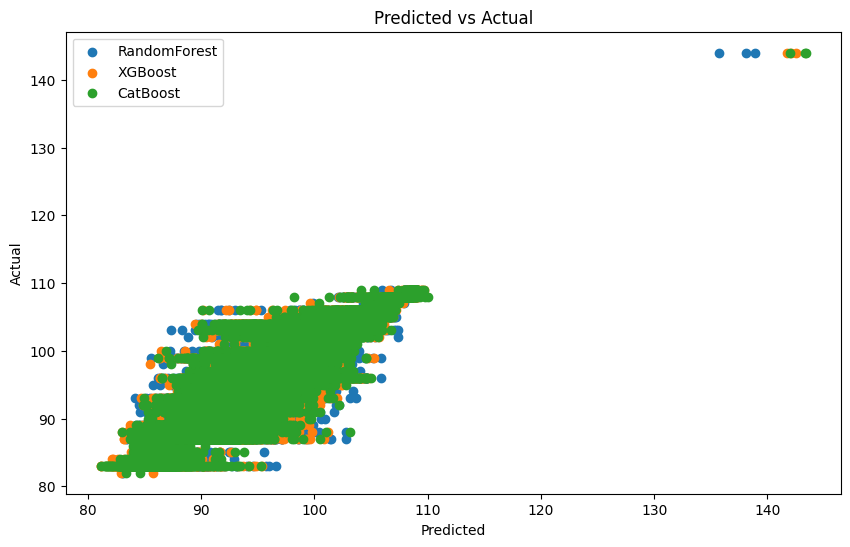

In [ ]:
#pca = PCA(n_components=4)
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data_cleaned = pd.read_csv('cleaned_data.csv')
# Remove leading and trailing spaces from column names
data_cleaned.columns = data_cleaned.columns.str.strip()
# Drop rows with NaN values
# Print the column names to check the presence of 'wifi_tput' and other columns
print(data_cleaned.columns)

y = data_cleaned['battery']
X = data_cleaned.drop(['battery'], axis=1)  # You can either include or drop it here

# Define feature subsets
feature_subsets = [['gtw_rssi'], ['soil_temp'], ['soil_hum'], ['frequency'], ['gtw_snr'],
                   ['gtw_rssi', 'soil_temp'], ['gtw_rssi', 'gtw_snr'], ['gtw_rssi', 'soil_hum'],
                   ['gtw_rssi', 'soil_temp', 'soil_hum'], ['gtw_rssi', 'soil_hum', 'frequency'],
                   ['gtw_rssi', 'soil_temp', 'frequency'], ['gtw_rssi', 'soil_hum',  'gtw_snr'],
                   ['gtw_rssi', 'soil_hum', 'soil_temp',  'gtw_snr'], ['gtw_rssi', 'soil_hum', 'soil_temp',  'gtw_snr', 'frequency']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train models
random_state = 42
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

trained_models = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    trained_models[model_name] = model

# Predict using trained models
predictions = {}
for model_name, model in trained_models.items():
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)
    predictions[model_name] = {'Train': y_pred_train, 'Test': y_pred_test}

# Calculate RMSE and Pov
results = {}
for model_name, preds in predictions.items():
    train_rmse = np.sqrt(mean_squared_error(y_train, preds['Train']))
    test_rmse = np.sqrt(mean_squared_error(y_test, preds['Test']))
    total_variance = np.var(y_test)
    residual_variance = np.var(y_test - preds['Test'])
    var_explained = 100 * (1 - (residual_variance / total_variance))
    results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Pov': var_explained}

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
plt.figure(figsize=(10, 6))
for model_name, preds in predictions.items():
    plt.scatter(preds['Test'], y_test, label=model_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()


Model: RandomForest
Test RMSE: 1.83436717868017
Variance Explained (%): 89.27917898918648

Model: XGBoost
Test RMSE: 1.927358952359916
Variance Explained (%): 88.16482737889386

Model: CatBoost
Test RMSE: 1.8944756583622955
Variance Explained (%): 88.56497577933993



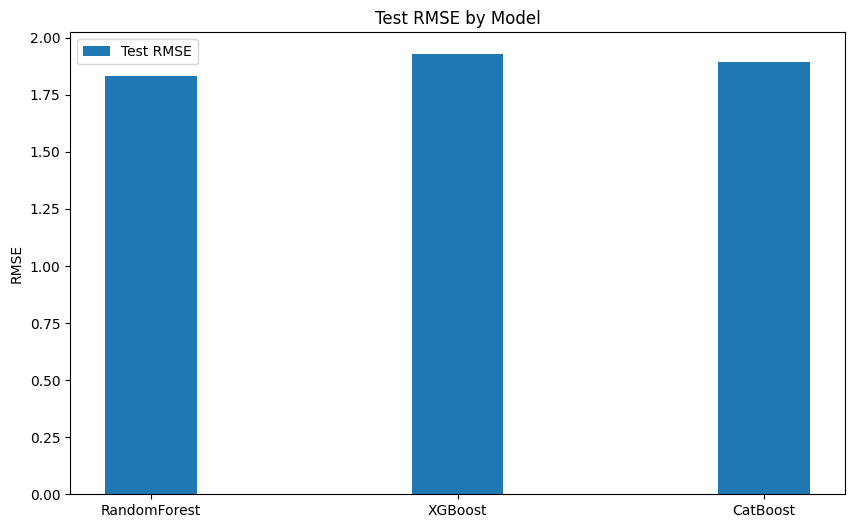

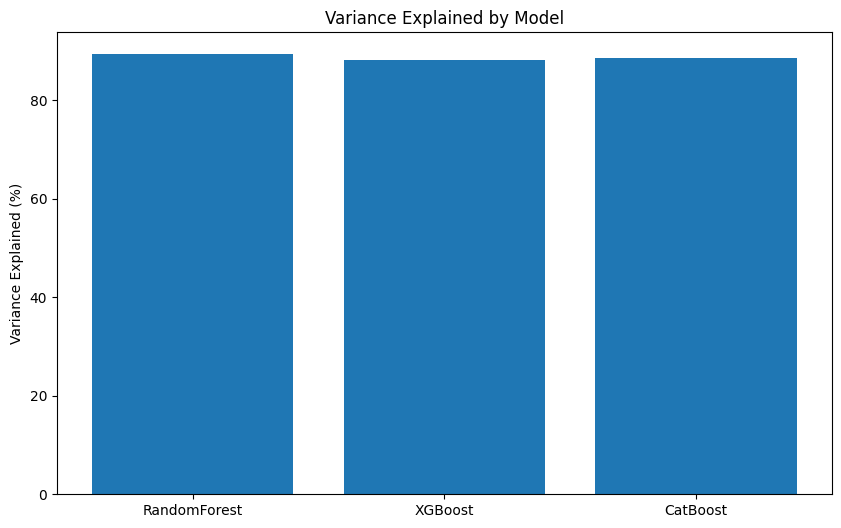

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data_cleaned = pd.read_csv('cleaned_data.csv')
# Remove leading and trailing spaces from column names
data_cleaned.columns = data_cleaned.columns.str.strip()

# Extract features and target
y = data_cleaned['battery']
X = data_cleaned.drop(['battery'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
n_components = 5  # Update this if necessary
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define train_models function
def train_models(X_train, y_train):
    # Define models
    models = {
        'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
        'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
    }

    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model

    return trained_models

# Define evaluate_models function
def evaluate_models(trained_models, X_test, y_test):
    results = {}
    for model_name, model in trained_models.items():
        y_pred_test = model.predict(X_test)

        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred_test)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        results[model_name] = {'Test RMSE': test_rmse, 'Variance Explained (%)': var_explained}

    return results

# Train models
trained_models = train_models(X_train_pca, y_train)

# Evaluate models using PCA and calculate RMSE and Pov
pca_results = evaluate_models(trained_models, X_test_pca, y_test)

# Print results
for model_name, metrics in pca_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
models = list(pca_results.keys())
test_rmse = [result['Test RMSE'] for result in pca_results.values()]
var_explained = [result['Variance Explained (%)'] for result in pca_results.values()]

x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x, test_rmse, width, label='Test RMSE')
ax.set_ylabel('RMSE')
ax.set_title('Test RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models, var_explained)
ax.set_ylabel('Variance Explained (%)')
ax.set_title('Variance Explained by Model')

plt.show()


In [ ]:
import pandas as pd


df = pd.read_csv('processed_weter_sensors.csv')

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df)

print(normalized_data)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)
# save df
normalized_df.to_csv('weter_sensors_minmax.csv')


อันดังเดิม

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('Minitaboutlie1.csv')
df.columns = df.columns.str.strip()

# Define target variable and features
y = df['gtw_snr']
X = df.drop(['gtw_snr'], axis=1)

# Define feature subsets
feature_subsets = [['gtw_rssi'], ['soil_temp'], ['soil_hum'], ['frequency'], ['soil_temp', 'soil_hum'], ['gtw_rssi', 'soil_temp', 'soil_hum'], ['gtw_rssi', 'frequency'], ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']]

# Define models
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through models and feature subsets
for model_name, model in models.items():
    print(f"Model: {model_name}")
    for subset in feature_subsets:
        start_time = time.time()

        # Train the model on the training data for the current feature subset
        model.fit(X_train[subset], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[subset])

        # Evaluate the model using Root Mean Squared Error (RMSE)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Calculate the percentage of variance explained
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        end_time = time.time()
        execution_time = end_time - start_time

        print(f"Features: {subset}, RMSE: {rmse}, Variance Explained: {var_explained:.2f}%, Time: {execution_time:.4f} seconds")
        print('-' * 40)


Model: RandomForest
Features: ['gtw_rssi'], RMSE: 1.0198072848699802, Variance Explained: 10.96%, Time: 8.1246 seconds
----------------------------------------
Features: ['soil_temp'], RMSE: 1.0824583857037535, Variance Explained: -0.31%, Time: 36.3211 seconds
----------------------------------------
Features: ['soil_hum'], RMSE: 1.0791274151702452, Variance Explained: 0.31%, Time: 36.8141 seconds
----------------------------------------
Features: ['frequency'], RMSE: 0.611855432731933, Variance Explained: 67.95%, Time: 3.5176 seconds
----------------------------------------
Features: ['soil_temp', 'soil_hum'], RMSE: 1.089397676937332, Variance Explained: -1.60%, Time: 61.1431 seconds
----------------------------------------
Features: ['gtw_rssi', 'soil_temp', 'soil_hum'], RMSE: 0.9995180723817034, Variance Explained: 14.47%, Time: 74.2041 seconds
----------------------------------------
Features: ['gtw_rssi', 'frequency'], RMSE: 0.5516876374546894, Variance Explained: 73.94%, Time: 11

ไม่เติมSNRในตัวแปรอิสระ

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df1 = pd.read_csv('cleaned_data (1).csv')
df1.columns = df1.columns.str.strip()

# Define target variable and features
y = df1['SNR']
X = df1.drop(['SNR'], axis=1)

# Define feature subsets
feature_subsets = [['gtw_rssi'], ['soil_temp'], ['soil_hum'], ['frequency'], ['soil_temp', 'soil_hum'], ['gtw_rssi', 'soil_temp', 'soil_hum'], ['gtw_rssi', 'frequency'], ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']]

# Define models
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through models and feature subsets
for model_name, model in models.items():
    print(f"Model: {model_name}")
    for subset in feature_subsets:
        start_time = time.time()

        # Train the model on the training data for the current feature subset
        model.fit(X_train[subset], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[subset])

        # Evaluate the model using Root Mean Squared Error (RMSE)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Calculate the percentage of variance explained
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        end_time = time.time()
        execution_time = end_time - start_time

        print(f"Features: {subset}, RMSE: {rmse}, Variance Explained: {var_explained:.2f}%, Time: {execution_time:.4f} seconds")
        print('-' * 40)


Model: RandomForest
Features: ['gtw_rssi'], RMSE: 1.038388914450681, Variance Explained: 10.80%, Time: 11.8435 seconds
----------------------------------------
Features: ['soil_temp'], RMSE: 1.1024864556816212, Variance Explained: -0.56%, Time: 39.7017 seconds
----------------------------------------
Features: ['soil_hum'], RMSE: 1.1000160894491637, Variance Explained: -0.11%, Time: 41.5396 seconds
----------------------------------------
Features: ['frequency'], RMSE: 0.6377944522511064, Variance Explained: 66.35%, Time: 3.6864 seconds
----------------------------------------
Features: ['soil_temp', 'soil_hum'], RMSE: 1.1116112944286456, Variance Explained: -2.23%, Time: 68.0548 seconds
----------------------------------------
Features: ['gtw_rssi', 'soil_temp', 'soil_hum'], RMSE: 1.0164466709727105, Variance Explained: 14.53%, Time: 83.6337 seconds
----------------------------------------
Features: ['gtw_rssi', 'frequency'], RMSE: 0.5783741072270989, Variance Explained: 72.33%, Time:

เติมSNRในตัวแปรอิสระ

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df1 = pd.read_csv('cleaned_data (1).csv')
df1.columns = df1.columns.str.strip()

# Define target variable and features
y = df1['SNR']
X = df1.drop(['SNR'], axis=1)

# Define feature subsets
feature_subsets = [['gtw_rssi'], ['soil_temp'], ['soil_hum'], ['frequency'], ['gtw_snr'], ['soil_temp', 'soil_hum'], ['gtw_rssi', 'soil_temp', 'soil_hum'], ['gtw_rssi', 'frequency'], ['gtw_rssi', 'gtw_snr', 'soil_temp', 'soil_hum', 'frequency']]

# Define models
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through models and feature subsets
for model_name, model in models.items():
    print(f"Model: {model_name}")
    for subset in feature_subsets:
        start_time = time.time()

        # Train the model on the training data for the current feature subset
        model.fit(X_train[subset], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[subset])

        # Evaluate the model using Root Mean Squared Error (RMSE)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Calculate the percentage of variance explained
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        end_time = time.time()
        execution_time = end_time - start_time

        print(f"Features: {subset}, RMSE: {rmse}, Variance Explained: {var_explained:.2f}%, Time: {execution_time:.4f} seconds")
        print('-' * 40)


Model: RandomForest
Features: ['gtw_rssi'], RMSE: 1.038388914450681, Variance Explained: 10.80%, Time: 14.2159 seconds
----------------------------------------
Features: ['soil_temp'], RMSE: 1.1024864556816212, Variance Explained: -0.56%, Time: 35.7530 seconds
----------------------------------------
Features: ['soil_hum'], RMSE: 1.1000160894491637, Variance Explained: -0.11%, Time: 52.6989 seconds
----------------------------------------
Features: ['frequency'], RMSE: 0.6377944522511064, Variance Explained: 66.35%, Time: 4.5508 seconds
----------------------------------------
Features: ['gtw_snr'], RMSE: 0.009915246710090577, Variance Explained: 99.99%, Time: 4.2381 seconds
----------------------------------------
Features: ['soil_temp', 'soil_hum'], RMSE: 1.1116112944286456, Variance Explained: -2.23%, Time: 73.5178 seconds
----------------------------------------
Features: ['gtw_rssi', 'soil_temp', 'soil_hum'], RMSE: 1.0164466709727105, Variance Explained: 14.53%, Time: 84.8183 seco

Index(['frequency', 'gtw_rssi', 'gtw_snr', 'soil_temp', 'soil_hum'], dtype='object')
Model: RandomForest
Features: ['gtw_rssi'], RMSE: 1.0198072848699802, Variance Explained: 10.96%, Time: 9.4756 seconds
----------------------------------------
Features: ['soil_temp'], RMSE: 1.0824583857037535, Variance Explained: -0.31%, Time: 46.6229 seconds
----------------------------------------
Features: ['soil_hum'], RMSE: 1.0791274151702452, Variance Explained: 0.31%, Time: 44.3678 seconds
----------------------------------------
Features: ['frequency'], RMSE: 0.611855432731933, Variance Explained: 67.95%, Time: 3.6897 seconds
----------------------------------------
Features: ['soil_temp', 'soil_hum'], RMSE: 1.089397676937332, Variance Explained: -1.60%, Time: 74.2465 seconds
----------------------------------------
Features: ['gtw_rssi', 'soil_temp', 'soil_hum'], RMSE: 0.9995180723817034, Variance Explained: 14.47%, Time: 84.8973 seconds
----------------------------------------
Features: ['gt

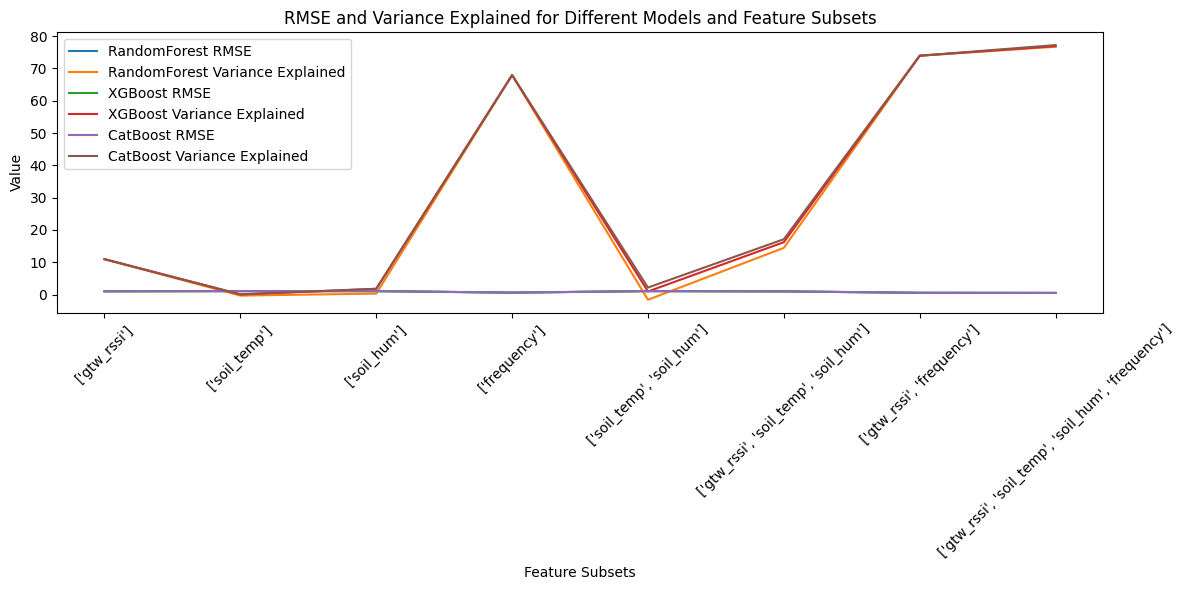

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
import numpy as np
import time
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_data.csv' with the path to your dataset file
df5 = pd.read_csv('Minitaboutlie1.csv')

# Remove leading and trailing spaces from column names
df5.columns = df5.columns.str.strip()

# Print the column names to check the presence of 'wifi_tput' and other columns
print(df5.columns)

SEED = 42

y = df5['gtw_snr']
X = df5.drop(['gtw_snr'], axis=1) # You can either include or drop it here

# Define feature subsets
feature_subsets = [['gtw_rssi'], ['soil_temp'], ['soil_hum'], ['frequency'], ['soil_temp', 'soil_hum'], ['gtw_rssi', 'soil_temp', 'soil_hum'], ['gtw_rssi', 'frequency'], ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']]


# Define models
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

# Lists to store results for plotting
rmse_results = []
variance_explained_results = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Loop through models and feature subsets
for model_name, model in models.items():
    print(f"Model: {model_name}")
    rmse_per_model = []
    var_explained_per_model = []
    for subset in feature_subsets:
        start_time = time.time()

        # Train the model on the training data for the current feature subset
        model.fit(X_train[subset], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[subset])

        # Evaluate the model using Root Mean Squared Error (RMSE)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Calculate the percentage of variance explained
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        end_time = time.time()
        execution_time = end_time - start_time

        print(f"Features: {subset}, RMSE: {rmse}, Variance Explained: {var_explained:.2f}%, Time: {execution_time:.4f} seconds")
        print('-' * 40)

        # Store results for plotting
        rmse_per_model.append(rmse)
        var_explained_per_model.append(var_explained)

    # Store results for all feature subsets
    rmse_results.append(rmse_per_model)
    variance_explained_results.append(var_explained_per_model)

# Plotting
plt.figure(figsize=(12, 6))

for i, model_name in enumerate(models.keys()):
    plt.plot(range(len(feature_subsets)), rmse_results[i], label=f'{model_name} RMSE')
    plt.plot(range(len(feature_subsets)), variance_explained_results[i], label=f'{model_name} Variance Explained')

plt.xlabel('Feature Subsets')
plt.ylabel('Value')
plt.title('RMSE and Variance Explained for Different Models and Feature Subsets')
plt.xticks(range(len(feature_subsets)), [str(subset) for subset in feature_subsets], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.9 MB/s eta 0:00:00


# ปรับพรามิเตอร์

# **XGBboot**

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

# Make predictions on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Calculate the RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Calculate the total variance of the target variable
total_variance = np.var(y_test)

# Calculate the residual variance
residual_variance = np.var(y_test - y_pred_test)

# Calculate the percentage of variance explained
pov = 100 * (1 - (residual_variance / total_variance))

print("Test RMSE:", test_rmse)
print("Percentage of Variance Explained (Pov):", pov)



Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best RMSE: 0.5277832749962371
Test RMSE: 0.5192629399791504
Percentage of Variance Explained (Pov): 76.91562905571534


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Load dataset
df_new = pd.read_csv('new_data.csv')

# Now you can use df_clean for modeling

# Remove leading and trailing spaces from column names
df_new.columns = df_new.columns.str.strip()
# Drop rows with NaN values

df_clean = df_new.dropna(axis=0)
# Print the column names to check the presence of 'wifi_tput' and other columns
print(df_clean.columns)

y = df_clean['gtw_snr']
X = df_clean.drop(['gtw_snr'], axis=1)  # You can either include or drop it here


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

# Make predictions on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Calculate the RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Calculate the total variance of the target variable
total_variance = np.var(y_test)

# Calculate the residual variance
residual_variance = np.var(y_test - y_pred_test)

# Calculate the percentage of variance explained
pov = 100 * (1 - (residual_variance / total_variance))

print("Test RMSE:", test_rmse)
print("Percentage of Variance Explained (Pov):", pov)



Index(['id', 'battery', 'frequency', 'gtw_rssi', 'gtw_snr', 'soil_temp',
       'soil_hum'],
      dtype='object')
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best RMSE: 0.5413974574117574
Test RMSE: 0.5363298508689823
Percentage of Variance Explained (Pov): 76.29390363533903


# **Random & catboot**

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Load dataset
df_new = pd.read_csv('new_data.csv')
# Now you can use df_clean for modeling
# Remove leading and trailing spaces from column names
df_new.columns = df_new.columns.str.strip()
# Drop rows with NaN values
df_clean = df_new.dropna(axis=0)
# Print the column names to check the presence of 'wifi_tput' and other columns
print(df_clean.columns)

y = df_clean['gtw_snr']
X = df_clean.drop(['gtw_snr'], axis=1)  # You can either include or drop it here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# กำหนดค่าที่ต้องการทำ Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # จำนวนต้นไม้ในประมาณ
    'max_depth': [None, 10, 20, 30],  # ความลึกของต้นไม้
    'min_samples_split': [2, 5, 10],  # จำนวนตัวอย่างขั้นต่ำที่จำเป็นในการแยกโหนด
    'min_samples_leaf': [1, 2, 4]  # จำนวนตัวอย่างขั้นต่ำในใบ
}

# สร้าง GridSearchCV สำหรับ RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# ปรับ Hyperparameters ด้วย Cross-Validation
grid_search_rf.fit(X_train, y_train)

# แสดงค่า Hyperparameters ที่ดีที่สุด
print("Best Parameters for RandomForest:")
print(grid_search_rf.best_params_)
print()

# สร้าง CatBoostRegressor
catboost = CatBoostRegressor(random_seed=42, silent=True)

# กำหนดค่าที่ต้องการทำ Hyperparameter Tuning
param_grid_catboost = {
    'depth': [6, 8, 10],  # ความลึกของต้นไม้
    'learning_rate': [0.01, 0.05, 0.1],  # อัตราการเรียนรู้
    'iterations': [50, 100, 200]  # จำนวนรอบการฝึก
}

# สร้าง GridSearchCV สำหรับ CatBoostRegressor
grid_search_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# ปรับ Hyperparameters ด้วย Cross-Validation
grid_search_catboost.fit(X_train, y_train)

# แสดงค่า Hyperparameters ที่ดีที่สุด
print("Best Parameters for CatBoost:")
print(grid_search_catboost.best_params_)


Index(['id', 'battery', 'frequency', 'gtw_rssi', 'gtw_snr', 'soil_temp',
       'soil_hum'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# กำหนดค่าที่ต้องการทำ Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # จำนวนต้นไม้ในประมาณ
    'max_depth': [None, 10, 20, 30],  # ความลึกของต้นไม้
    'min_samples_split': [2, 5, 10],  # จำนวนตัวอย่างขั้นต่ำที่จำเป็นในการแยกโหนด
    'min_samples_leaf': [1, 2, 4]  # จำนวนตัวอย่างขั้นต่ำในใบ
}

# สร้าง GridSearchCV สำหรับ RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# ปรับ Hyperparameters ด้วย Cross-Validation
grid_search_rf.fit(X_train, y_train)

# แสดงค่า Hyperparameters ที่ดีที่สุด
print("Best Parameters for RandomForest:")
print(grid_search_rf.best_params_)
print()

# สร้าง CatBoostRegressor
catboost = CatBoostRegressor(random_seed=42, silent=True)

# กำหนดค่าที่ต้องการทำ Hyperparameter Tuning
param_grid_catboost = {
    'depth': [6, 8, 10],  # ความลึกของต้นไม้
    'learning_rate': [0.01, 0.05, 0.1],  # อัตราการเรียนรู้
    'iterations': [50, 100, 200]  # จำนวนรอบการฝึก
}

# สร้าง GridSearchCV สำหรับ CatBoostRegressor
grid_search_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# ปรับ Hyperparameters ด้วย Cross-Validation
grid_search_catboost.fit(X_train, y_train)

# แสดงค่า Hyperparameters ที่ดีที่สุด
print("Best Parameters for CatBoost:")
print(grid_search_catboost.best_params_)


Best Parameters for RandomForest:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Best Parameters for CatBoost:
{'depth': 10, 'iterations': 200, 'learning_rate': 0.1}


RandomForest Test RMSE: 0.5219064164197289
RandomForest Percentage of Variance Explained (Pov): 76.679904378316
XGBoost Test RMSE: 0.5192629399791504
XGBoost Percentage of Variance Explained (Pov): 76.91562905571534
CatBoost Test RMSE: 0.5238403743710042
CatBoost Percentage of Variance Explained (Pov): 76.50753799339722


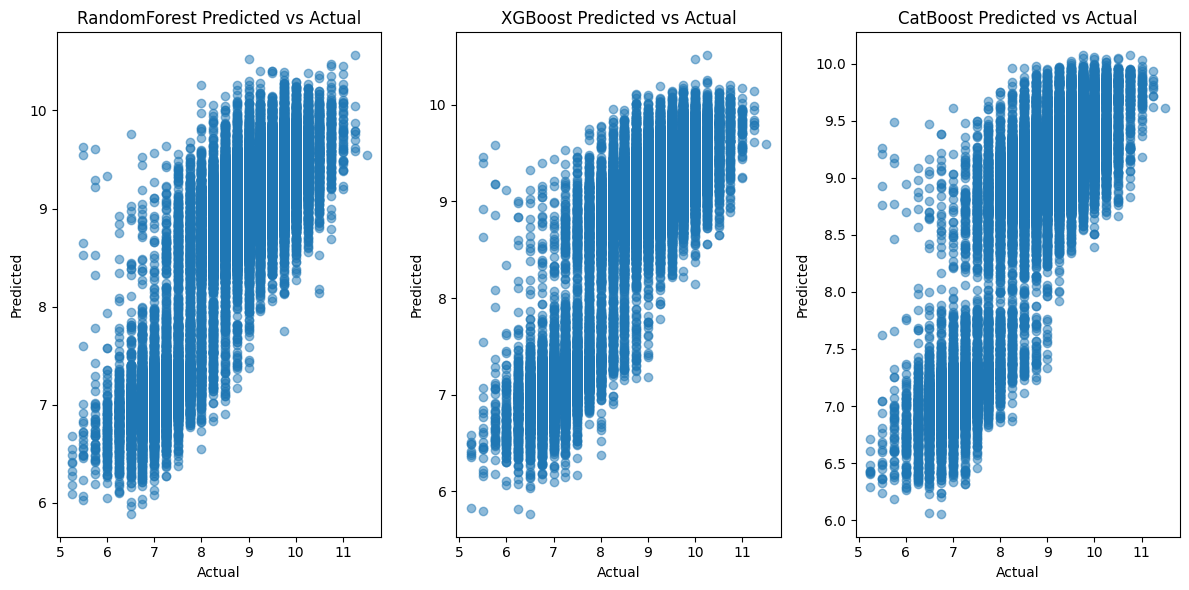

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest with best parameters
best_params_rf = {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
best_model_rf = RandomForestRegressor(**best_params_rf)
best_model_rf.fit(X_train, y_train)
y_pred_rf = best_model_rf.predict(X_test)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
pov_rf = 100 * (1 - (np.var(y_test - y_pred_rf) / np.var(y_test)))

# XGBoost with best parameters
best_params_xgb = {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
best_model_xgb = XGBRegressor(**best_params_xgb)
best_model_xgb.fit(X_train, y_train)
y_pred_xgb = best_model_xgb.predict(X_test)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
pov_xgb = 100 * (1 - (np.var(y_test - y_pred_xgb) / np.var(y_test)))

# CatBoost with best parameters
best_params_catboost = {'depth': 10, 'iterations': 200, 'learning_rate': 0.1}
best_model_catboost = CatBoostRegressor(**best_params_catboost, silent=True)
best_model_catboost.fit(X_train, y_train)
y_pred_catboost = best_model_catboost.predict(X_test)
test_rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
pov_catboost = 100 * (1 - (np.var(y_test - y_pred_catboost) / np.var(y_test)))

# Print test RMSE and Pov for each model
print("RandomForest Test RMSE:", test_rmse_rf)
print("RandomForest Percentage of Variance Explained (Pov):", pov_rf)
print("XGBoost Test RMSE:", test_rmse_xgb)
print("XGBoost Percentage of Variance Explained (Pov):", pov_xgb)
print("CatBoost Test RMSE:", test_rmse_catboost)
print("CatBoost Percentage of Variance Explained (Pov):", pov_catboost)

# Plotting Predicted vs Actual values for each model
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest Predicted vs Actual')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_catboost, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CatBoost Predicted vs Actual')

plt.tight_layout()
plt.show()


**meteetnew1**

RandomForest Test RMSE: 0.5560870221787713
RandomForest Percentage of Variance Explained (Pov): 73.52607697377496
XGBoost Test RMSE: 0.5192629399791504
XGBoost Percentage of Variance Explained (Pov): 76.91562905571534
CatBoost Test RMSE: 0.5255115974382768
CatBoost Percentage of Variance Explained (Pov): 76.35761529933386


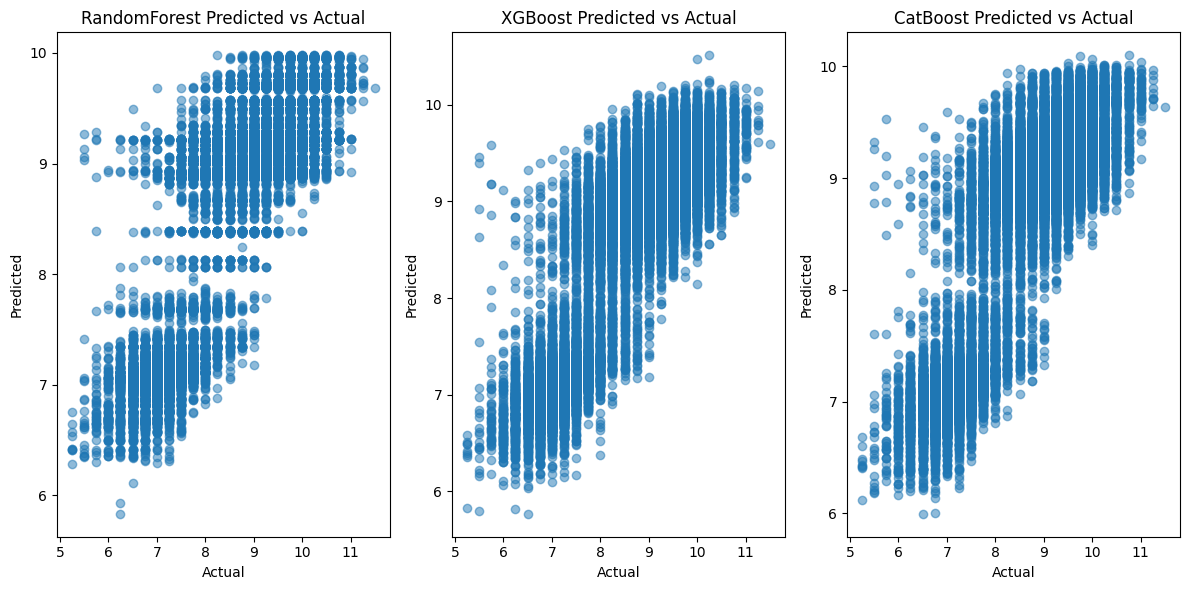

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest with best parameters
best_params_rf = {'n_estimators': 200, 'max_depth': 7}
best_model_rf = RandomForestRegressor(**best_params_rf)
best_model_rf.fit(X_train, y_train)
y_pred_rf = best_model_rf.predict(X_test)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
pov_rf = 100 * (1 - (np.var(y_test - y_pred_rf) / np.var(y_test)))

# XGBoost with best parameters
best_params_xgb = {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
best_model_xgb = XGBRegressor(**best_params_xgb)
best_model_xgb.fit(X_train, y_train)
y_pred_xgb = best_model_xgb.predict(X_test)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
pov_xgb = 100 * (1 - (np.var(y_test - y_pred_xgb) / np.var(y_test)))

# CatBoost with best parameters
best_params_catboost = {'iterations': 200, 'depth': 7, 'learning_rate': 0.2}
best_model_catboost = CatBoostRegressor(**best_params_catboost, silent=True)
best_model_catboost.fit(X_train, y_train)
y_pred_catboost = best_model_catboost.predict(X_test)
test_rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
pov_catboost = 100 * (1 - (np.var(y_test - y_pred_catboost) / np.var(y_test)))

# Print test RMSE and Pov for each model
print("RandomForest Test RMSE:", test_rmse_rf)
print("RandomForest Percentage of Variance Explained (Pov):", pov_rf)
print("XGBoost Test RMSE:", test_rmse_xgb)
print("XGBoost Percentage of Variance Explained (Pov):", pov_xgb)
print("CatBoost Test RMSE:", test_rmse_catboost)
print("CatBoost Percentage of Variance Explained (Pov):", pov_catboost)

# Plotting Predicted vs Actual values for each model
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest Predicted vs Actual')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_catboost, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CatBoost Predicted vs Actual')

plt.tight_layout()
plt.show()


In [ ]:
X_train.shape[1]

4

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
#feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']
# Define feature subsets
feature_subsets = [['gtw_rssi'], ['soil_temp'], ['soil_hum'], ['frequency'], ['soil_temp', 'soil_hum'], ['gtw_rssi', 'soil_temp', 'soil_hum'],['gtw_rssi', 'frequency'],['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define functions for PCA and t-SNE
def apply_PCA(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

def apply_tSNE(X_train, X_test, n_components):
    tsne = TSNE(n_components=n_components, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train)
    X_test_tsne = tsne.transform(X_test)
    return X_train_tsne, X_test_tsne

# Train models
def train_models(X_train, y_train, random_state=42):
    models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
    }
    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model
    return trained_models

trained_models = train_models(X_train, y_train)

# Calculate R-squared (coefficient of determination)
def calculate_r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_total)
    return r_squared

# Evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test, method='PCA', n_components=2):
    results = {}
    for model_name, model in models.items():
        if method == 'PCA':
            X_train_transformed, X_test_transformed = apply_PCA(X_train, X_test, n_components)
        elif method == 'tSNE':
            X_train_transformed, X_test_transformed = apply_tSNE(X_train, X_test, n_components)
        else:
            raise ValueError("Invalid method. Please choose either 'PCA' or 'tSNE'.")

        # Make predictions
        y_pred_train = model.predict(X_train_transformed)
        y_pred_test = model.predict(X_test_transformed)

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

        # Calculate R-squared
        train_r_squared = calculate_r_squared(y_train, y_pred_train)
        test_r_squared = calculate_r_squared(y_test, y_pred_test)

        results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Train R-squared': train_r_squared, 'Test R-squared': test_r_squared}

    return results

# Evaluate models using PCA
pca_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, method='PCA', n_components=4)

# Function to plot data after dimensionality reduction
def plot_data(X_transformed, y, method='PCA'):
    plt.figure(figsize=(8, 6))
    if method == 'PCA':
        plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolor='k')
        plt.title('PCA')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    elif method == 'tSNE':
        plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolor='k')
        plt.title('t-SNE')
        plt.xlabel('t-SNE component 1')
        plt.ylabel('t-SNE component 2')
    plt.colorbar(label='Target')
    plt.show()

# Evaluate models using PCA
pca_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, method='PCA', n_components=4)

# Print PCA results
print("PCA Results:")
for model_name, metrics in pca_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Evaluate models using t-SNE
tsne_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, method='tSNE', n_components=2)

# Print t-SNE results
print("t-SNE Results:")
for model_name, metrics in tsne_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


# Plot PCA data
X_train_pca, X_test_pca = apply_PCA(X_train, X_test, n_components=2)
plot_data(X_train_pca, y_train, method='PCA')

# Plot t-SNE data
X_train_tsne, X_test_tsne = apply_tSNE(X_train, X_test, n_components=2)
plot_data(X_train_tsne, y_train, method='tSNE')


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
#feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']
# Define feature subsets
feature_subsets = [['gtw_rssi'], ['soil_temp'], ['soil_hum'], ['frequency'], ['soil_temp', 'soil_hum'], ['gtw_rssi', 'soil_temp', 'soil_hum'],['gtw_rssi', 'frequency'],['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define functions for PCA and t-SNE
def apply_PCA(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

def apply_tSNE(X_train, X_test, n_components):
    tsne = TSNE(n_components=n_components, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train)
    X_test_tsne = tsne.transform(X_test)
    return X_train_tsne, X_test_tsne

# Train models
def train_models(X_train, y_train, random_state=42):
    models = {
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=random_state),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=random_state),
        'CatBoost': CatBoostRegressor(iterations=100, random_seed=random_state, silent=True)
    }
    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model
    return trained_models

trained_models = train_models(X_train, y_train)

# Calculate R-squared (coefficient of determination)
def calculate_r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_total)
    return r_squared

# Evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test, method='PCA', n_components=2):
    results = {}
    for model_name, model in models.items():
        if method == 'PCA':
            X_train_transformed, X_test_transformed = apply_PCA(X_train, X_test, n_components)
        elif method == 'tSNE':
            X_train_transformed, X_test_transformed = apply_tSNE(X_train, X_test, n_components)
        else:
            raise ValueError("Invalid method. Please choose either 'PCA' or 'tSNE'.")

        # Make predictions
        y_pred_train = model.predict(X_train_transformed)
        y_pred_test = model.predict(X_test_transformed)

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

        # Calculate R-squared
        train_r_squared = calculate_r_squared(y_train, y_pred_train)
        test_r_squared = calculate_r_squared(y_test, y_pred_test)

        results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Train R-squared': train_r_squared, 'Test R-squared': test_r_squared}

    return results

# Evaluate models using PCA
pca_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, method='PCA', n_components=4)

# Function to plot data after dimensionality reduction
def plot_data(X_transformed, y, method='PCA'):
    plt.figure(figsize=(8, 6))
    if method == 'PCA':
        plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolor='k')
        plt.title('PCA')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    elif method == 'tSNE':
        plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolor='k')
        plt.title('t-SNE')
        plt.xlabel('t-SNE component 1')
        plt.ylabel('t-SNE component 2')
    plt.colorbar(label='Target')
    plt.show()

# Evaluate models using PCA
pca_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, method='PCA', n_components=4)

# Print PCA results
print("PCA Results:")
for model_name, metrics in pca_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Evaluate models using t-SNE
tsne_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, method='tSNE', n_components=2)

# Print t-SNE results
print("t-SNE Results:")
for model_name, metrics in tsne_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


# Plot PCA data
X_train_pca, X_test_pca = apply_PCA(X_train, X_test, n_components=2)
plot_data(X_train_pca, y_train, method='PCA')

# Plot t-SNE data
X_train_tsne, X_test_tsne = apply_tSNE(X_train, X_test, n_components=2)
plot_data(X_train_tsne, y_train, method='tSNE')


PCA Results:
Model: RandomForest
Train RMSE: 1.1099487947054394
Test RMSE: 1.1083798548783066
Train R-squared: -0.04811683442228665
Test R-squared: -0.05180527110739308

Model: XGBoost
Train RMSE: 1.2236629221454258
Test RMSE: 1.2137606327585584
Train R-squared: -0.2738767471662247
Test R-squared: -0.26131682896834785

Model: CatBoost
Train RMSE: 1.103739981503026
Test RMSE: 1.1024415892960189
Train R-squared: -0.03642375321912383
Test R-squared: -0.04056513989846078



AttributeError: 'TSNE' object has no attribute 'transform'

Model: RandomForest
Train RMSE: 0.8627207386905019
Test RMSE: 0.9973088082561158
Pov: 14.846357166882473

Model: XGBoost
Train RMSE: 0.9674808910943679
Test RMSE: 0.9915798358298082
Pov: 15.822855535124791

Model: CatBoost
Train RMSE: 0.9756861051804131
Test RMSE: 0.988658157651456
Pov: 16.318489936502367



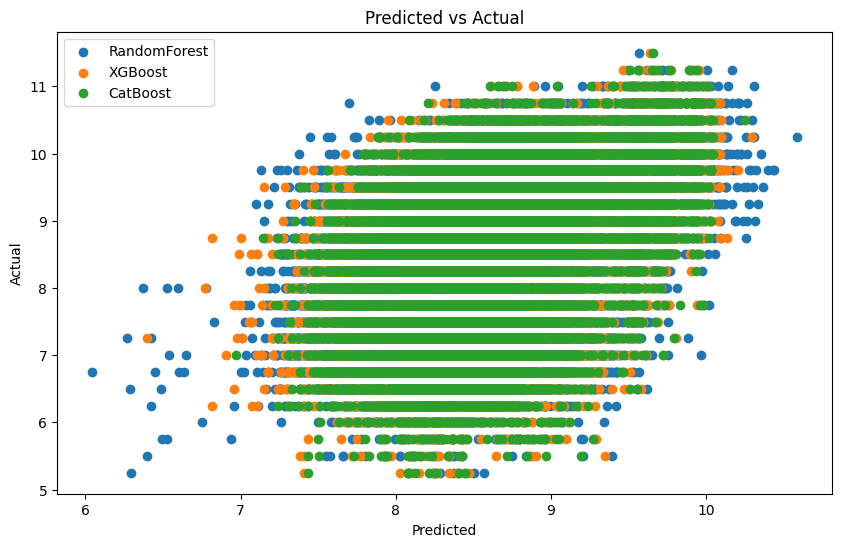

In [ ]:
#N=2ให้ค่าความแม่นยำต่ำ
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train models
random_state = 42
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

trained_models = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    trained_models[model_name] = model

# Predict using trained models
predictions = {}
for model_name, model in trained_models.items():
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)
    predictions[model_name] = {'Train': y_pred_train, 'Test': y_pred_test}

# Calculate RMSE and Pov
results = {}
for model_name, preds in predictions.items():
    train_rmse = np.sqrt(mean_squared_error(y_train, preds['Train']))
    test_rmse = np.sqrt(mean_squared_error(y_test, preds['Test']))
    total_variance = np.var(y_test)
    residual_variance = np.var(y_test - preds['Test'])
    var_explained = 100 * (1 - (residual_variance / total_variance))
    results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Pov': var_explained}

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
plt.figure(figsize=(10, 6))
for model_name, preds in predictions.items():
    plt.scatter(preds['Test'], y_test, label=model_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()


Model: RandomForest
Train RMSE: 0.4114961002781838
Test RMSE: 0.5206282111527972
Pov: 76.79414555103004

Model: XGBoost
Train RMSE: 0.48265105961422833
Test RMSE: 0.5186132016353301
Pov: 76.97323765767618

Model: CatBoost
Train RMSE: 0.48983498954734284
Test RMSE: 0.5154861613154368
Pov: 77.2505404188086



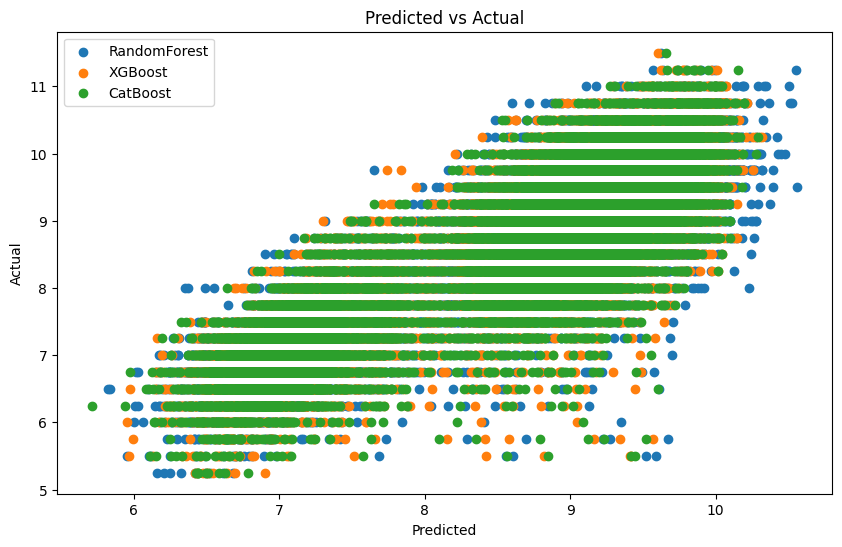

In [ ]:
#pca = PCA(n_components=4)
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train models
random_state = 42
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

trained_models = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    trained_models[model_name] = model

# Predict using trained models
predictions = {}
for model_name, model in trained_models.items():
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)
    predictions[model_name] = {'Train': y_pred_train, 'Test': y_pred_test}

# Calculate RMSE and Pov
results = {}
for model_name, preds in predictions.items():
    train_rmse = np.sqrt(mean_squared_error(y_train, preds['Train']))
    test_rmse = np.sqrt(mean_squared_error(y_test, preds['Test']))
    total_variance = np.var(y_test)
    residual_variance = np.var(y_test - preds['Test'])
    var_explained = 100 * (1 - (residual_variance / total_variance))
    results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Pov': var_explained}

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
plt.figure(figsize=(10, 6))
for model_name, preds in predictions.items():
    plt.scatter(preds['Test'], y_test, label=model_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()


In [ ]:
#pca = PCA(n_components=5)
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train models
random_state = 42
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
}

trained_models = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    trained_models[model_name] = model

# Predict using trained models
predictions = {}
for model_name, model in trained_models.items():
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)
    predictions[model_name] = {'Train': y_pred_train, 'Test': y_pred_test}

# Calculate RMSE and Pov
results = {}
for model_name, preds in predictions.items():
    train_rmse = np.sqrt(mean_squared_error(y_train, preds['Train']))
    test_rmse = np.sqrt(mean_squared_error(y_test, preds['Test']))
    total_variance = np.var(y_test)
    residual_variance = np.var(y_test - preds['Test'])
    var_explained = 100 * (1 - (residual_variance / total_variance))
    results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Pov': var_explained}

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
plt.figure(figsize=(10, 6))
for model_name, preds in predictions.items():
    plt.scatter(preds['Test'], y_test, label=model_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()


In [ ]:
print(X_train)

        frequency  gtw_rssi  soil_temp  soil_hum
43104       867.3       -60       6.50     90.97
1801        867.9       -74       9.02     72.76
25716       868.5       -83       5.31     71.91
82788       868.3       -72       2.46     72.12
126785      867.9       -74       2.81     87.73
...           ...       ...        ...       ...
119879      867.1       -75       1.43     63.33
103694      868.1       -81       3.98     75.92
131932      868.3       -55       1.82     69.06
146867      868.5       -83       2.81     90.57
121958      867.7       -71       2.27     87.82

[142956 rows x 4 columns]


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define function for PCA
def apply_PCA(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca, pca

# Train models
def train_models(X_train, y_train, random_state=42):
    models = {
        'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
        'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
    }
    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model
    return trained_models

# Evaluate models and calculate RMSE and Pov
def evaluate_models(models, X_train, X_test, y_train, y_test, n_components=2):
    results = {}
    for model_name, model in models.items():
        # Apply PCA
        X_train_pca, X_test_pca, pca = apply_PCA(X_train, X_test, n_components)

        # Combine PCA-transformed features with target (y)
        train_combined = np.column_stack((X_train_pca, y_train))
        test_combined = np.column_stack((X_test_pca, y_test))

        # Train the model
        model.fit(X_train_pca, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train_pca)
        y_pred_test = model.predict(X_test_pca)

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

        # Calculate Pov
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred_test)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Variance Explained (%)': var_explained}

    return results

# Train models
trained_models = train_models(X_train, y_train)

# Evaluate models using PCA and calculate RMSE and Pov
pca_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, n_components=4)

# Print results
for model_name, metrics in pca_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
models = list(pca_results.keys())
train_rmse = [result['Train RMSE'] for result in pca_results.values()]
test_rmse = [result['Test RMSE'] for result in pca_results.values()]
var_explained = [result['Variance Explained (%)'] for result in pca_results.values()]

x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, train_rmse, width, label='Train RMSE')
bar2 = ax.bar(x + width/2, test_rmse, width, label='Test RMSE')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models, var_explained)
ax.set_ylabel('Variance Explained (%)')
ax.set_title('Variance Explained by Model')

plt.show()


Model: RandomForest
Train RMSE: 0.4095999281512237
Test RMSE: 0.5253323090662076
Variance Explained (%): 76.40082687972247

Model: XGBoost
Train RMSE: 0.4792259403836933
Test RMSE: 0.5239540868326129
Variance Explained (%): 76.52422830382203

Model: CatBoost
Train RMSE: 0.48683883531000005
Test RMSE: 0.5200808226814495
Variance Explained (%): 76.87059382097947



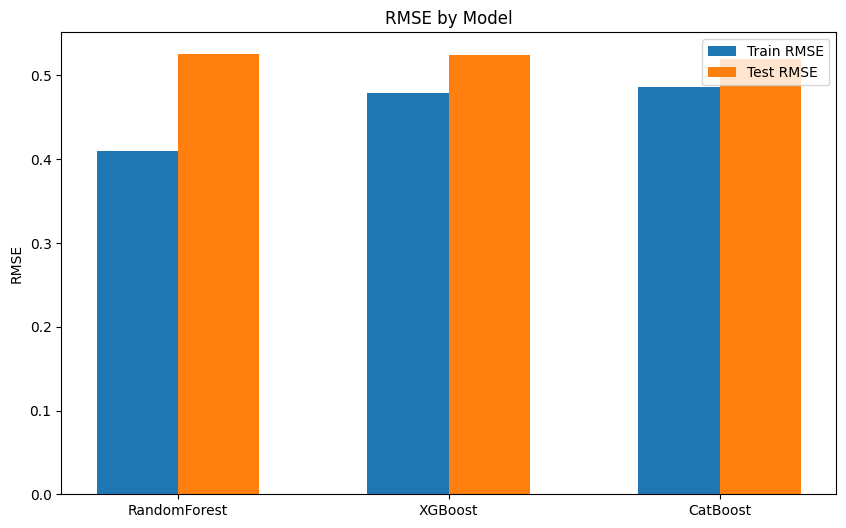

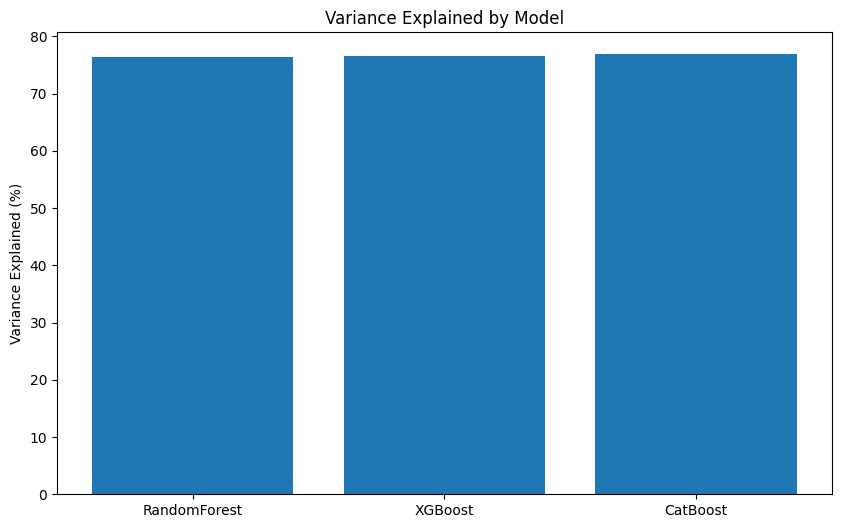

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define function for PCA
def apply_PCA(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca, pca

# Train models
def train_models(X_train, y_train, random_state=42):
    models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
    }
    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model
    return trained_models

# Evaluate models and calculate RMSE and Pov
def evaluate_models(models, X_train, X_test, y_train, y_test, n_components=2):
    results = {}
    for model_name, model in models.items():
        # Apply PCA
        X_train_pca, X_test_pca, pca = apply_PCA(X_train, X_test, n_components)

        # Combine PCA-transformed features with target (y)
        train_combined = np.column_stack((X_train_pca, y_train))
        test_combined = np.column_stack((X_test_pca, y_test))

        # Train the model
        model.fit(X_train_pca, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train_pca)
        y_pred_test = model.predict(X_test_pca)

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

        # Calculate Pov
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred_test)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Variance Explained (%)': var_explained}

    return results

# Train models
trained_models = train_models(X_train, y_train)

# Evaluate models using PCA and calculate RMSE and Pov
pca_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, n_components=4)

# Print results
for model_name, metrics in pca_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
models = list(pca_results.keys())
train_rmse = [result['Train RMSE'] for result in pca_results.values()]
test_rmse = [result['Test RMSE'] for result in pca_results.values()]
var_explained = [result['Variance Explained (%)'] for result in pca_results.values()]

x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, train_rmse, width, label='Train RMSE')
bar2 = ax.bar(x + width/2, test_rmse, width, label='Test RMSE')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models, var_explained)
ax.set_ylabel('Variance Explained (%)')
ax.set_title('Variance Explained by Model')

plt.show()


Model: RandomForest
Train RMSE: 0.4114961002781838
Test RMSE: 0.5206282111527972
Variance Explained (%): 76.79414555103004

Model: XGBoost
Train RMSE: 0.48265105961422833
Test RMSE: 0.5186132016353301
Variance Explained (%): 76.97323765767618

Model: CatBoost
Train RMSE: 0.48983498954734284
Test RMSE: 0.5154861613154368
Variance Explained (%): 77.2505404188086



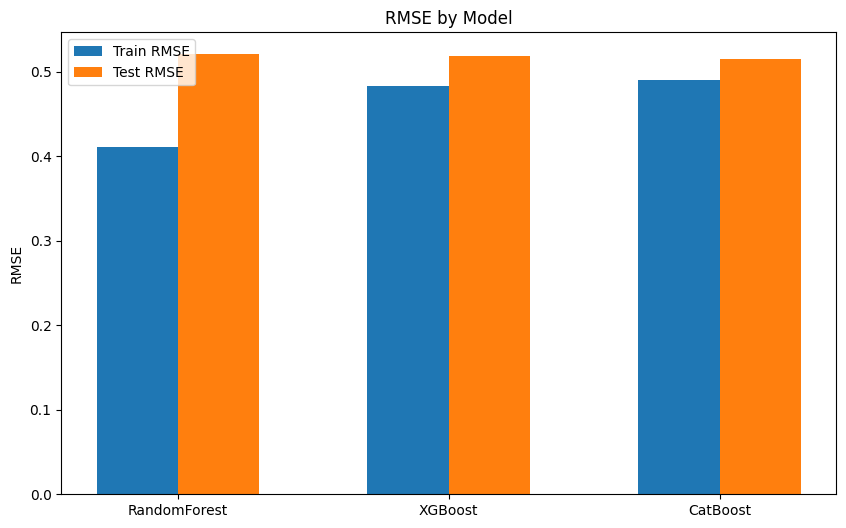

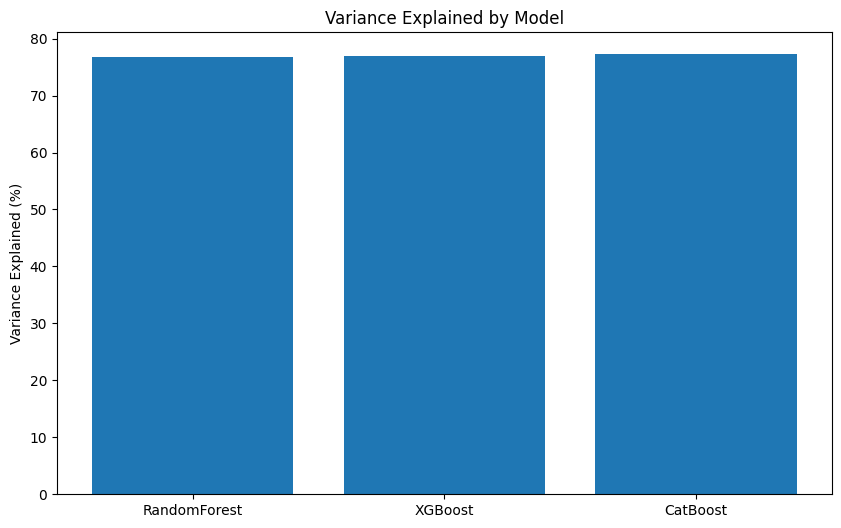

In [ ]:
#อันนี้PCA แคทบูทให้ค่าดี 77.
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function for PCA
def apply_PCA(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca, pca

# Train models
def train_models(X_train, y_train, random_state=42):
    models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, learning_rate=0.1, random_seed=42, silent=True)
    }
    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model
    return trained_models

# Evaluate models and calculate RMSE and Pov
def evaluate_models(models, X_train, X_test, y_train, y_test, n_components=4):
    results = {}
    for model_name, model in models.items():
        # Apply PCA
        X_train_pca, X_test_pca, pca = apply_PCA(X_train, X_test, n_components)

        # Combine PCA-transformed features with target (y)
        train_combined = np.column_stack((X_train_pca, y_train))
        test_combined = np.column_stack((X_test_pca, y_test))

        # Train the model
        model.fit(X_train_pca, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train_pca)
        y_pred_test = model.predict(X_test_pca)

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

        # Calculate Pov
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred_test)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Variance Explained (%)': var_explained}

    return results

# Train models
trained_models = train_models(X_train, y_train)

# Evaluate models using PCA and calculate RMSE and Pov
pca_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, n_components=4)

# Print results
for model_name, metrics in pca_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
models = list(pca_results.keys())
train_rmse = [result['Train RMSE'] for result in pca_results.values()]
test_rmse = [result['Test RMSE'] for result in pca_results.values()]
var_explained = [result['Variance Explained (%)'] for result in pca_results.values()]

x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, train_rmse, width, label='Train RMSE')
bar2 = ax.bar(x + width/2, test_rmse, width, label='Test RMSE')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models, var_explained)
ax.set_ylabel('Variance Explained (%)')
ax.set_title('Variance Explained by Model')

plt.show()


Model: RandomForest
Train RMSE: 0.2058717466256284
Test RMSE: 0.5419098970822003
Variance Explained (%): 74.85810809086874

Model: XGBoost
Train RMSE: 0.5089632359564912
Test RMSE: 0.5215405756443385
Variance Explained (%): 76.71321211804877

Model: CatBoost
Train RMSE: 0.5285150568800859
Test RMSE: 0.5276685151252961
Variance Explained (%): 76.16329457323825



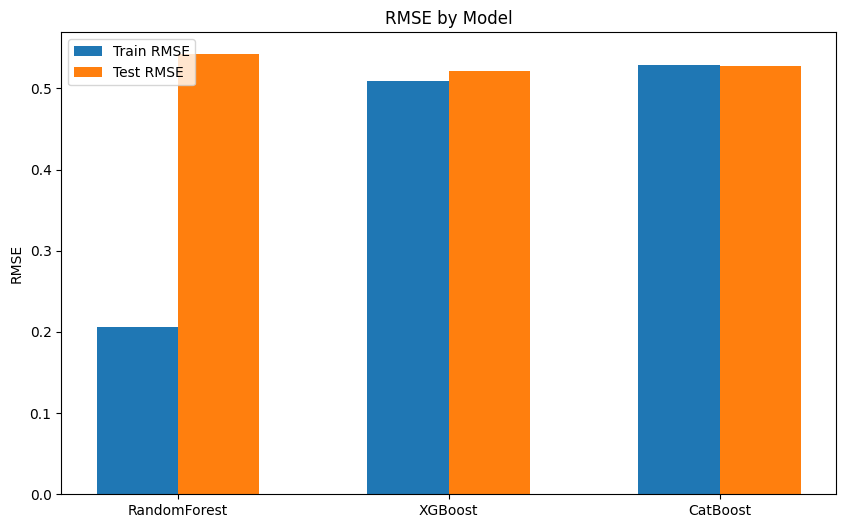

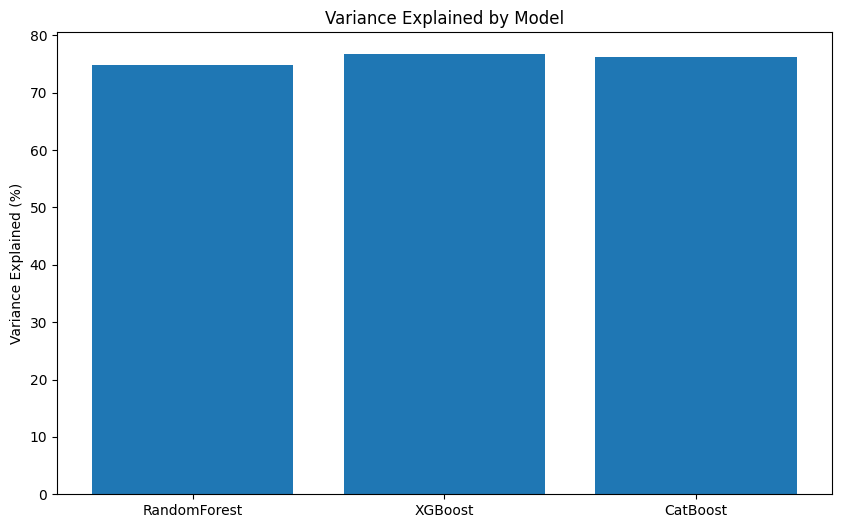

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function for PCA
def apply_PCA(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca, pca

# Train models
def train_models(X_train, y_train, random_state=42):
    models = {
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=random_state),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=random_state),
        'CatBoost': CatBoostRegressor(iterations=100, random_seed=random_state, silent=True)
    }
    trained_models = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model
    return trained_models

# Evaluate models and calculate RMSE and Pov
def evaluate_models(models, X_train, X_test, y_train, y_test, n_components=2):
    results = {}
    for model_name, model in models.items():
        # Apply PCA
        X_train_pca, X_test_pca, pca = apply_PCA(X_train, X_test, n_components)

        # Combine PCA-transformed features with target (y)
        train_combined = np.column_stack((X_train_pca, y_train))
        test_combined = np.column_stack((X_test_pca, y_test))

        # Train the model
        model.fit(X_train_pca, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train_pca)
        y_pred_test = model.predict(X_test_pca)

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

        # Calculate Pov
        total_variance = np.var(y_test)
        residual_variance = np.var(y_test - y_pred_test)
        var_explained = 100 * (1 - (residual_variance / total_variance))

        results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Variance Explained (%)': var_explained}

    return results

# Train models
trained_models = train_models(X_train, y_train)

# Evaluate models using PCA and calculate RMSE and Pov
pca_results = evaluate_models(trained_models, X_train, X_test, y_train, y_test, n_components=4)

# Print results
for model_name, metrics in pca_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
models = list(pca_results.keys())
train_rmse = [result['Train RMSE'] for result in pca_results.values()]
test_rmse = [result['Test RMSE'] for result in pca_results.values()]
var_explained = [result['Variance Explained (%)'] for result in pca_results.values()]

x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, train_rmse, width, label='Train RMSE')
bar2 = ax.bar(x + width/2, test_rmse, width, label='Test RMSE')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models, var_explained)
ax.set_ylabel('Variance Explained (%)')
ax.set_title('Variance Explained by Model')

plt.show()


# **T-SAN**

Model: RandomForest
Train RMSE: 0.7517461424881113

Model: XGBoost
Train RMSE: 0.9184465919366162

Model: CatBoost
Train RMSE: 0.9839146904041123



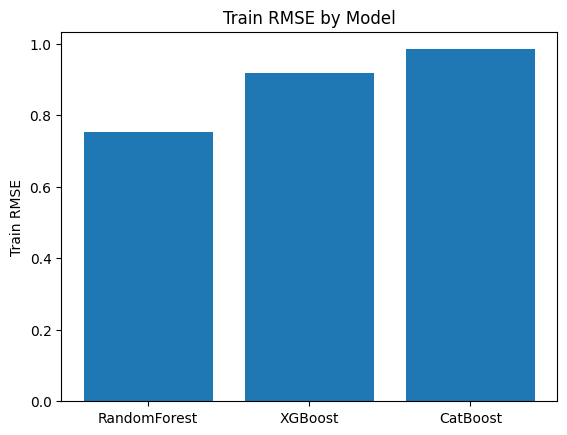

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df1 = pd.read_csv('Minitaboutlie1.csv')
df1.columns = df1.columns.str.strip()

# Split the data into features (X) and target (y)
y = df1['gtw_snr']
X = df1.drop(['gtw_snr'], axis=1)

# Specify feature names
feature_names = ['gtw_rssi', 'soil_temp', 'soil_hum', 'frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function for t-SNE
def apply_tSNE(X_train, n_components):
    # Initialize t-SNE with desired number of components
    tsne = TSNE(n_components=n_components)
    X_train_tsne = tsne.fit_transform(X_train)
    return X_train_tsne

# Evaluate models and calculate RMSE and Pov using t-SNE
def evaluate_models_tSNE(models, X_train, X_test, y_train, y_test, n_components=3):
    results = {}
    for model_name, model in models.items():
        # Apply t-SNE
        X_train_tsne = apply_tSNE(X_train, n_components)

        # Train the model
        model.fit(X_train_tsne, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train_tsne)

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

        results[model_name] = {'Train RMSE': train_rmse}

    return results

# Train models
models = {
    'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2, random_state=42),
    'CatBoost': CatBoostRegressor(depth=10, iterations=200, learning_rate=0.1, random_seed=42, silent=True)
}

# Evaluate models using t-SNE and calculate RMSE
tsne_results = evaluate_models_tSNE(models, X_train, X_test, y_train, y_test, n_components=2)

# Print results
for model_name, metrics in tsne_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Plot results
models = list(tsne_results.keys())
train_rmse = [result['Train RMSE'] for result in tsne_results.values()]

plt.bar(models, train_rmse)
plt.ylabel('Train RMSE')
plt.title('Train RMSE by Model')
plt.show()

